# Marketing Campaign Sales Analysis using Python

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("KAG_conversion_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [4]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


### Check Unique Values in the age Column

In [5]:
print(data['age'].unique())

['30-34' '35-39' '40-44' '45-49']


## Create a Copy of the Data

In [6]:
data_tf = data.copy()

## Replace Age Ranges with Numeric Values

In [7]:
data_tf['age'] = data_tf['age'].replace({
    '30-34': 32, 
    '35-39': 37, 
    '40-44': 42, 
    '45-49': 47
})

C:\Users\hp\AppData\Local\Temp\ipykernel_7752\3965915032.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_tf['age'] = data_tf['age'].replace({


In [8]:
# Convert age to Integer

In [9]:
data_tf['age'] = data_tf['age'].astype(int)
print(data_tf['age'].unique())  # Check the unique values again
print(data_tf['age'].dtypes) # Check data type of 'age' column

[32 37 42 47]
int32


In [10]:
# Convert gender to Integer

In [11]:
data_tf['gender'] = data_tf['gender'].replace({'M': 0, 'F': 1})
data_tf['gender'] = data_tf['gender'].astype(int)

C:\Users\hp\AppData\Local\Temp\ipykernel_7752\2626613562.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_tf['gender'] = data_tf['gender'].replace({'M': 0, 'F': 1})


In [12]:
data_tf = data_tf.rename(columns={
    'xyz_campaign_id': 'xyzCampId', 
    'fb_campaign_id': 'fbCampId',
    'Impressions': 'impr', 
    'Total_Conversion': 'conv', 
    'Approved_Conversion': 'appConv'
})

In [13]:
data_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ad_id      1143 non-null   int64  
 1   xyzCampId  1143 non-null   int64  
 2   fbCampId   1143 non-null   int64  
 3   age        1143 non-null   int32  
 4   gender     1143 non-null   int32  
 5   interest   1143 non-null   int64  
 6   impr       1143 non-null   int64  
 7   Clicks     1143 non-null   int64  
 8   Spent      1143 non-null   float64
 9   conv       1143 non-null   int64  
 10  appConv    1143 non-null   int64  
dtypes: float64(1), int32(2), int64(8)
memory usage: 89.4 KB


In [14]:
data_tf.describe()

,ad_id,xyzCampId,fbCampId,age,gender,interest,impr,Clicks,Spent,conv,appConv
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,38.321085,0.482065,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,5.903868,0.499897,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,32.000000,0.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,32.000000,0.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,37.000000,0.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,42.000000,1.000000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,47.000000,1.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [15]:
from sklearn.preprocessing import StandardScaler

## Standardize the data

In [16]:
scaler = StandardScaler()
data_mat_norm = scaler.fit_transform(data_tf.select_dtypes(include='number'))

data_mat_norm_df = pd.DataFrame(data_mat_norm, columns=data_tf.select_dtypes(include='number').columns)

## Creating a Heatmap

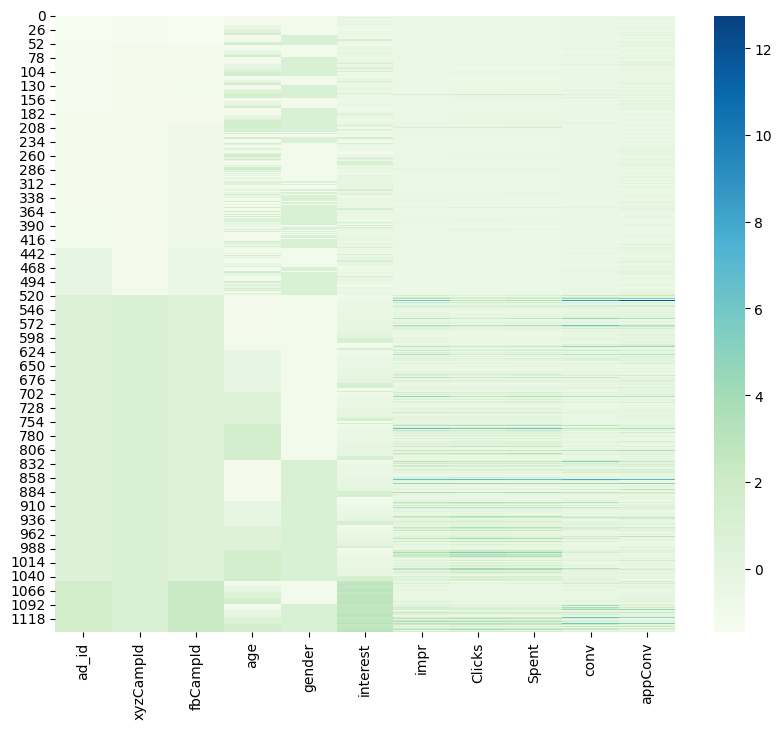

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data_mat_norm_df, cmap='GnBu', annot=False, cbar=True)
plt.show()

In [18]:
data_tf['CTR'] = (data_tf['Clicks'] / data_tf['impr']) * 100
data_tf['CPC'] = data_tf['Spent'] / data_tf['Clicks']

In [19]:
data_tf['CTR'] = data_tf['CTR'].round(4)  # Round CTR to 4 decimal places
data_tf['CPC'] = data_tf['CPC'].round(2)  # Round CPC to 2 decimal places

In [20]:
data_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ad_id      1143 non-null   int64  
 1   xyzCampId  1143 non-null   int64  
 2   fbCampId   1143 non-null   int64  
 3   age        1143 non-null   int32  
 4   gender     1143 non-null   int32  
 5   interest   1143 non-null   int64  
 6   impr       1143 non-null   int64  
 7   Clicks     1143 non-null   int64  
 8   Spent      1143 non-null   float64
 9   conv       1143 non-null   int64  
 10  appConv    1143 non-null   int64  
 11  CTR        1143 non-null   float64
 12  CPC        936 non-null    float64
dtypes: float64(3), int32(2), int64(8)
memory usage: 107.3 KB


In [21]:
data_tf.head()

,ad_id,xyzCampId,fbCampId,age,gender,interest,impr,Clicks,Spent,conv,appConv,CTR,CPC
0,708746,916,103916,32,0,15,7350,1,1.43,2,1,0.0136,1.43
1,708749,916,103917,32,0,16,17861,2,1.82,2,0,0.0112,0.91
2,708771,916,103920,32,0,20,693,0,0.00,1,0,0.0000,NaN
3,708815,916,103928,32,0,28,4259,1,1.25,1,0,0.0235,1.25
4,708818,916,103928,32,0,28,4133,1,1.29,1,1,0.0242,1.29


##  create a new DataFrame that only contains specific columns (CTR, CPC, appConv, conv, impr, Spent, Clicks).

In [22]:
data_tf_trim = data_tf[['CTR', 'CPC', 'appConv', 'conv', 'impr', 'Spent', 'Clicks']]

In [23]:
# Handling Missing Values (Removing NAs)

In [24]:
data_tf_trim = data_tf_trim.dropna()  

In [25]:
# Standardize the selected columns
scaler = StandardScaler()
data_tf_trim_norm = scaler.fit_transform(data_tf_trim)

# Convert the result back into a DataFrame
data_tf_trim_norm_df = pd.DataFrame(data_tf_trim_norm, columns=data_tf_trim.columns)

## Correlation Matrix and Heatmap

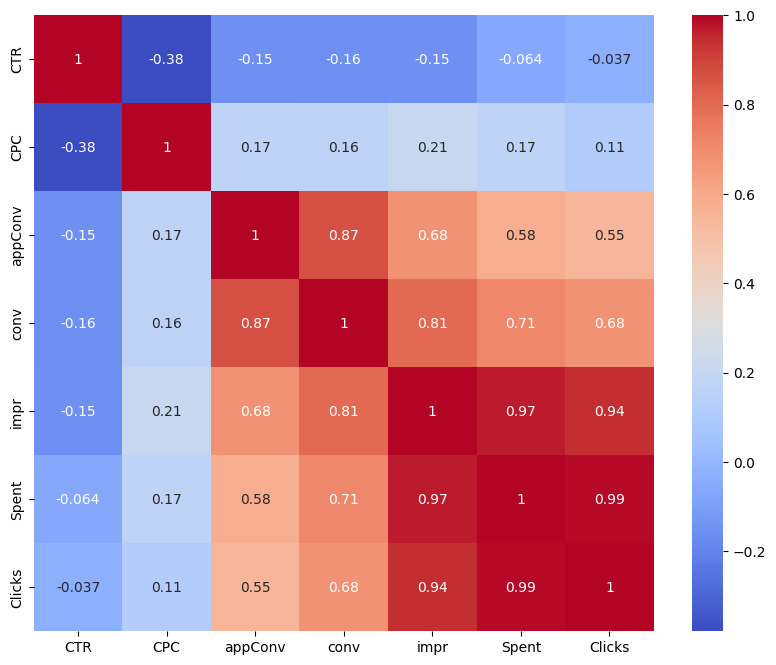

In [26]:
# Calculate the correlation matrix
corr_matrix = data_tf_trim_norm_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, cbar=True)
plt.show()

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

## Boxplot: Campaign vs Advertising Spend

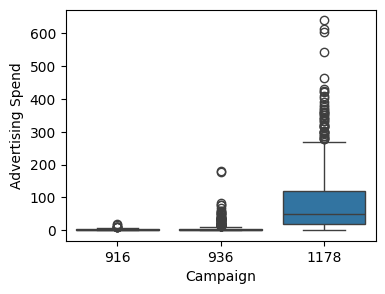

In [28]:
import seaborn as sns

plt.figure(figsize=(4, 3))  # Set figure size
sns.boxplot(x='xyzCampId', y='Spent', data=data_tf)
plt.xlabel('Campaign')
plt.ylabel('Advertising Spend')
plt.show()

## Boxplot: Campaign vs Conversions

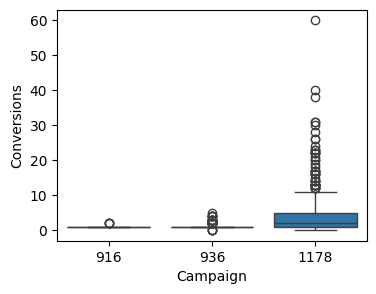

In [29]:
plt.figure(figsize=(4, 3))  # Set figure size
sns.boxplot(x='xyzCampId', y='conv', data=data_tf)
plt.xlabel('Campaign')
plt.ylabel('Conversions')
plt.show()

In [30]:
data_1178 = data_tf[data_tf['xyzCampId'] == 1178]  # Filter campaign 1178
print(data_1178.info())  # Glimpse-like output

<class 'pandas.core.frame.DataFrame'>
Index: 625 entries, 518 to 1142
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ad_id      625 non-null    int64  
 1   xyzCampId  625 non-null    int64  
 2   fbCampId   625 non-null    int64  
 3   age        625 non-null    int32  
 4   gender     625 non-null    int32  
 5   interest   625 non-null    int64  
 6   impr       625 non-null    int64  
 7   Clicks     625 non-null    int64  
 8   Spent      625 non-null    float64
 9   conv       625 non-null    int64  
 10  appConv    625 non-null    int64  
 11  CTR        625 non-null    float64
 12  CPC        613 non-null    float64
dtypes: float64(3), int32(2), int64(8)
memory usage: 63.5 KB
None


## Handling Missing Data (plot_missing)

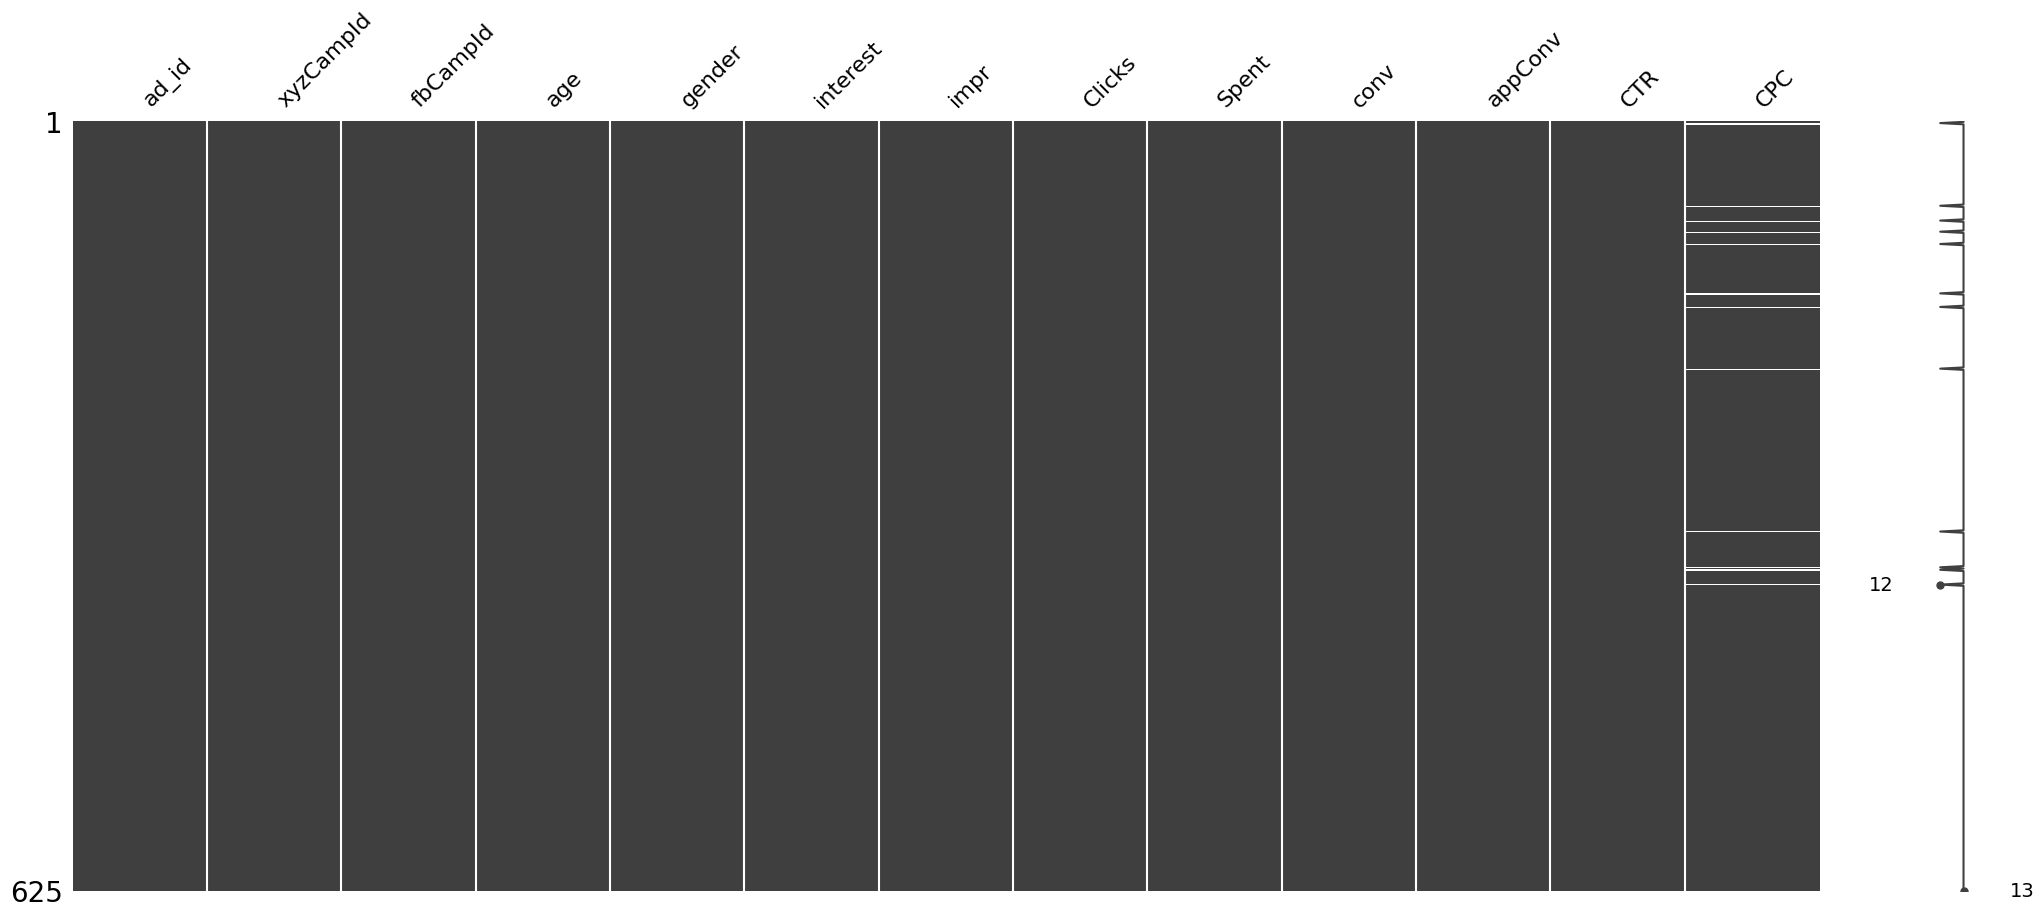

ad_id         0
xyzCampId     0
fbCampId      0
age           0
gender        0
interest      0
impr          0
Clicks        0
Spent         0
conv          0
appConv       0
CTR           0
CPC          12
dtype: int64


In [31]:
import missingno as msno

msno.matrix(data_1178)  # Visualizes missing values in the data
plt.show()

print(data_1178.isnull().sum())  # Check how many missing values per column

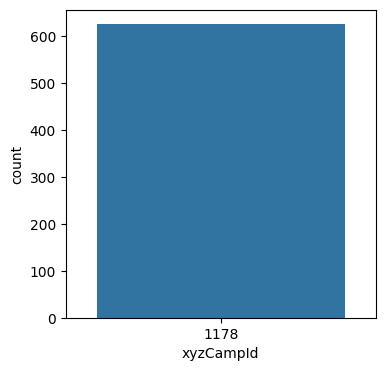

In [32]:
plt.figure(figsize=(4, 4))  # Set figure size
sns.countplot(x='xyzCampId', data=data_1178)  # Bar plot for campaign 1178
plt.show()

<Figure size 800x400 with 0 Axes>

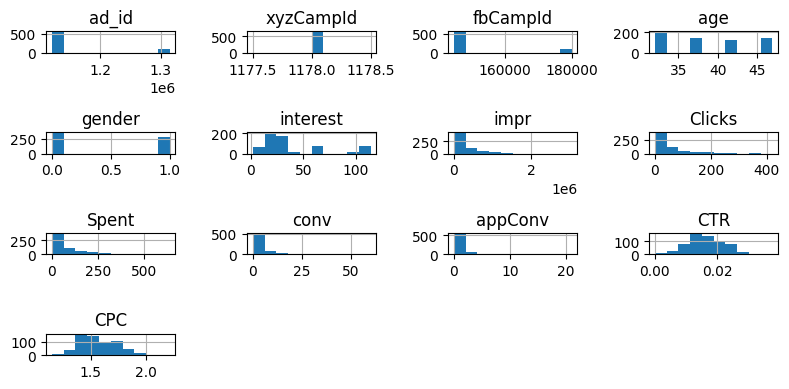

In [33]:
plt.figure(figsize=(8, 4))  # Set plot size
data_1178.hist(figsize=(8, 4))  # Histograms for all numeric columns
plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()

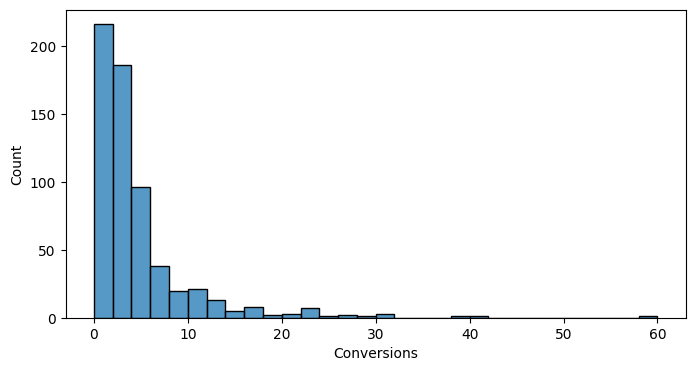

In [34]:
plt.figure(figsize=(8, 4))  # Set figure size
sns.histplot(data=data_1178, x='conv', bins=30)  # Histogram for 'conv'
plt.xlabel('Conversions')
plt.show()

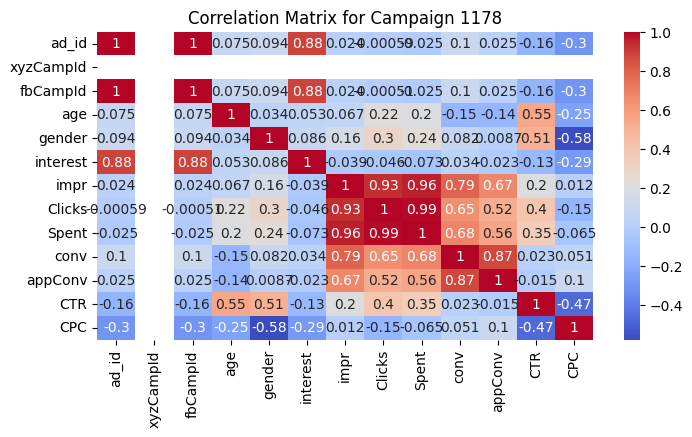

In [35]:
# Calculate correlation matrix
corr_matrix_1178 = data_1178.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(8, 4))  # Set plot size
sns.heatmap(corr_matrix_1178, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Campaign 1178')
plt.show()

In [36]:
# Create new columns in the DataFrame
data_1178['totConv'] = data_1178['conv'] + data_1178['appConv']  # Total Conversions
data_1178['conVal'] = data_1178['conv'] * 5  # Conversion Value
data_1178['appConVal'] = data_1178['appConv'] * 100  # Approved Conversion Value
data_1178['totConVal'] = data_1178['conVal'] + data_1178['appConVal']  # Total Conversion Value

# Calculate cost per conversion and ROAS (Return on Ad Spend)
data_1178['costPerCon'] = (data_1178['Spent'] / data_1178['totConv']).round(2)
data_1178['ROAS'] = (data_1178['totConVal'] / data_1178['Spent']).round(2)

C:\Users\hp\AppData\Local\Temp\ipykernel_7752\1118547365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1178['totConv'] = data_1178['conv'] + data_1178['appConv']  # Total Conversions
C:\Users\hp\AppData\Local\Temp\ipykernel_7752\1118547365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1178['conVal'] = data_1178['conv'] * 5  # Conversion Value
C:\Users\hp\AppData\Local\Temp\ipykernel_7752\1118547365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [37]:
# Calculate CPM (Cost Per 1000 Impressions)
data_1178['CPM'] = ((data_1178['Spent'] / data_1178['impr']) * 1000).round(2)

C:\Users\hp\AppData\Local\Temp\ipykernel_7752\4174215098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1178['CPM'] = ((data_1178['Spent'] / data_1178['impr']) * 1000).round(2)


In [38]:
data_1178.head()

,ad_id,xyzCampId,fbCampId,age,gender,interest,impr,Clicks,Spent,conv,appConv,CTR,CPC,totConv,conVal,appConVal,totConVal,costPerCon,ROAS,CPM
518,1121091,1178,144531,32,0,10,1194718,141,254.049996,28,14,0.0118,1.80,42,140,1400,1540,6.05,6.06,0.21
519,1121092,1178,144531,32,0,10,637648,67,122.400000,13,5,0.0105,1.83,18,65,500,565,6.80,4.62,0.19
520,1121094,1178,144531,32,0,10,24362,0,0.000000,1,1,0.0000,NaN,2,5,100,105,0.00,inf,0.00
521,1121095,1178,144531,32,0,10,459690,50,86.330001,5,2,0.0109,1.73,7,25,200,225,12.33,2.61,0.19
522,1121096,1178,144531,32,0,10,750060,86,161.909999,11,2,0.0115,1.88,13,55,200,255,12.45,1.57,0.22


## Preliminary analysis of campaign 1178

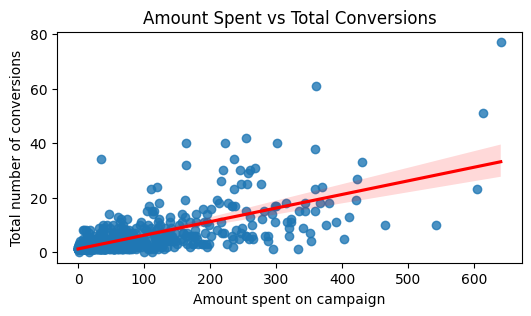

In [39]:
plt.figure(figsize=(6, 3))  # Set figure size
sns.regplot(x='Spent', y='totConv', data=data_1178, line_kws={"color": "red"})  # Scatter plot with regression line
plt.xlabel('Amount spent on campaign')
plt.ylabel('Total number of conversions')
plt.title('Amount Spent vs Total Conversions')
plt.show()

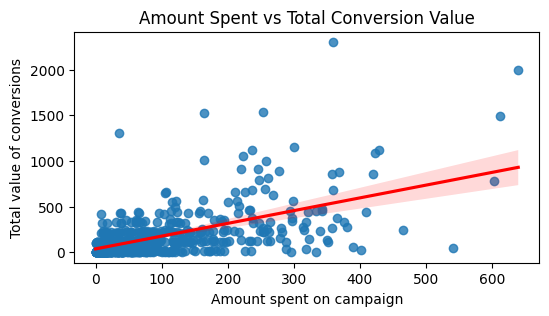

In [40]:
plt.figure(figsize=(6, 3))  # Set figure size
sns.regplot(x='Spent', y='totConVal', data=data_1178, line_kws={"color": "red"})  # Scatter plot with regression line
plt.xlabel('Amount spent on campaign')
plt.ylabel('Total value of conversions')
plt.title('Amount Spent vs Total Conversion Value')
plt.show()

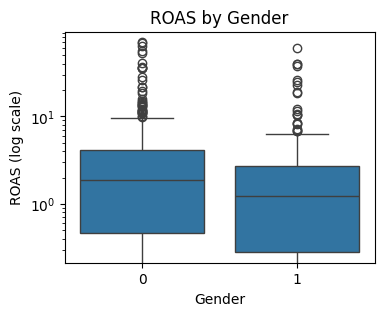

In [41]:
plt.figure(figsize=(4, 3))  # Set figure size
sns.boxplot(x='gender', y='ROAS', data=data_1178)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Gender')
plt.ylabel('ROAS (log scale)')
plt.title('ROAS by Gender')
plt.show()

## Wilcoxon Test

In [42]:
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U Test (equivalent to Wilcoxon rank-sum test)
gender_0_roas = data_1178[data_1178['gender'] == 0]['ROAS']
gender_1_roas = data_1178[data_1178['gender'] == 1]['ROAS']

# Perform test
stat, p_value = mannwhitneyu(gender_0_roas, gender_1_roas)
print(f'Mann-Whitney U Test statistic: {stat}, p-value: {p_value}')

Mann-Whitney U Test statistic: 57454.0, p-value: 3.3968794893511017e-05


## Summarizing ROAS by Gender

In [43]:
# Summarize median and mean ROAS by gender
data_1178_filtered = data_1178[data_1178['ROAS'] != float('inf')]  # Remove 'Inf' values

grouped_data = data_1178_filtered.groupby('gender').agg(
    medianROAS=('ROAS', 'median'),
    meanROAS=('ROAS', 'mean')
).reset_index()

print(grouped_data)

   gender  medianROAS  meanROAS
0       0       1.880  4.504633
1       1       1.225  2.819228


In [44]:
# Boxplot: Interest Identifier vs Number of Clicks

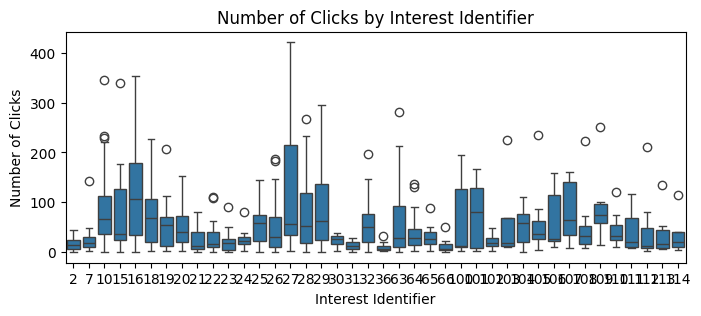

In [45]:
plt.figure(figsize=(8, 3))  # Set plot size
sns.boxplot(x='interest', y='Clicks', data=data_1178)
plt.xlabel('Interest Identifier')
plt.ylabel('Number of Clicks')
plt.title('Number of Clicks by Interest Identifier')
plt.show()

In [46]:
# Boxplot: Interest Identifier vs ROAS (Log Scale)

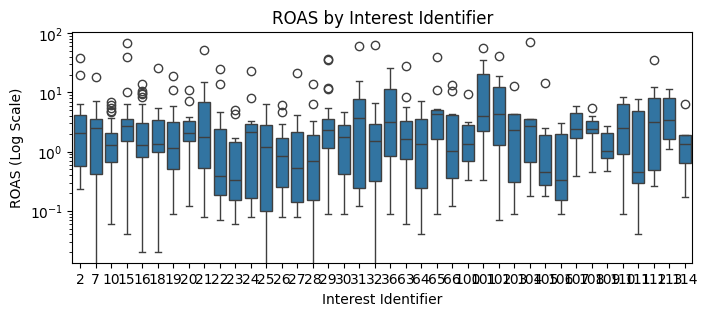

In [47]:
plt.figure(figsize=(8, 3))  # Set plot size
sns.boxplot(x='interest', y='ROAS', data=data_1178)
plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Interest Identifier')
plt.ylabel('ROAS (Log Scale)')
plt.title('ROAS by Interest Identifier')
plt.show()

In [48]:
# Summarizing Data by Interest and ROAS

In [49]:
# Summarize data by interest, filtering out Inf ROAS values
summary_by_interest = data_1178_filtered.groupby('interest').agg(
    medianROAS=('ROAS', 'median'),
    meanROAS=('ROAS', 'mean'),
    totalClicks=('Clicks', 'sum')
).sort_values(by='meanROAS', ascending=False).head(10)

print(summary_by_interest)

          medianROAS   meanROAS  totalClicks
interest                                    
104            2.750  15.512000          265
101            3.960  14.954286          524
102            4.270  10.354286          150
31             3.640   8.259286          189
112            3.210   8.060000          339
15             2.685   7.889000         1554
36             3.210   7.379231          126
65             4.380   6.996364          343
21             1.770   6.343810          493
2              2.080   5.410000          306


##  Boxplot: Interest ID vs ROAS by Gender

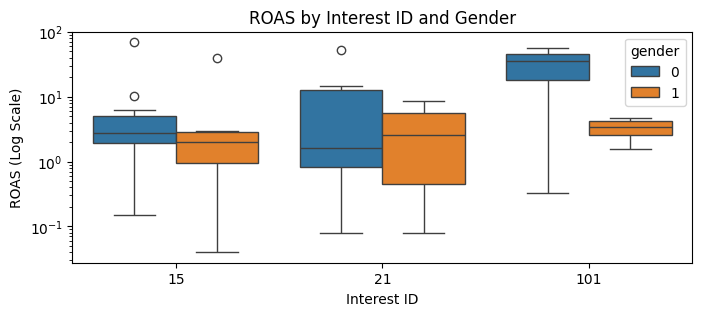

In [50]:
plt.figure(figsize=(8, 3))  # Set plot size
filtered_data = data_1178[(data_1178['interest'].isin([101, 15, 21]))]
sns.boxplot(x='interest', y='ROAS', hue='gender', data=filtered_data)
plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Interest ID')
plt.ylabel('ROAS (Log Scale)')
plt.title('ROAS by Interest ID and Gender')
plt.show()

In [51]:
# Summarize ROAS and clicks by interest and gender
summary_interest_gender = data_1178_filtered[
    (data_1178_filtered['interest'].isin([101, 15, 21]))
].groupby(['interest', 'gender']).agg(
    medianROAS=('ROAS', 'median'),
    meanROAS=('ROAS', 'mean'),
    totalClicks=('Clicks', 'sum')
).sort_values(by='meanROAS', ascending=False)

print(summary_interest_gender)

                 medianROAS   meanROAS  totalClicks
interest gender                                    
101      0           35.470  30.526667           17
21       0            1.620   9.626000          200
15       0            2.790   8.893333          827
         1            1.980   6.382500          727
21       1            2.600   3.360000          293
101      1            3.405   3.275000          507


## Boxplot: ROAS by Age Group and Interest (Filtered by Gender and Interest)

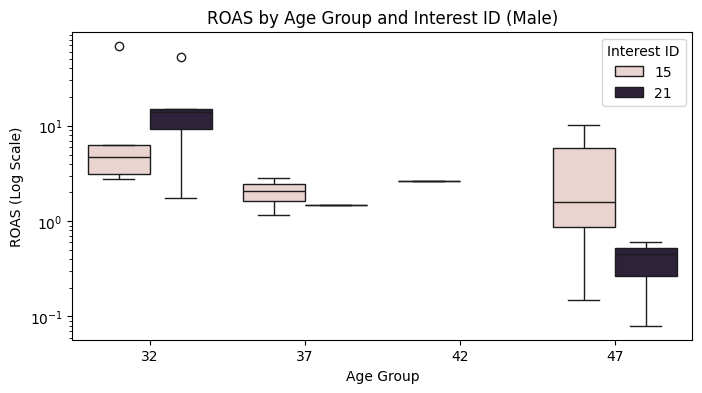

In [52]:
plt.figure(figsize=(8, 4))  # Set plot size
filtered_data_age = data_1178[(data_1178['interest'].isin([21, 15])) & (data_1178['gender'] == 0)]
sns.boxplot(x='age', y='ROAS', hue='interest', data=filtered_data_age)
plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Age Group')
plt.ylabel('ROAS (Log Scale)')
plt.title('ROAS by Age Group and Interest ID (Male)')
plt.legend(title='Interest ID')
plt.show()

## Summarizing by Age, Interest, and Gender

In [53]:
# Summarize ROAS and clicks by age, interest, and gender
summary_age_interest_gender = data_1178_filtered[
    (data_1178_filtered['interest'].isin([21, 15])) & (data_1178_filtered['gender'] == 0)
].groupby(['age', 'interest']).agg(
    medianROAS=('ROAS', 'median'),
    meanROAS=('ROAS', 'mean'),
    totalClicks=('Clicks', 'sum')
).sort_values(by='meanROAS', ascending=False)

print(summary_age_interest_gender)

              medianROAS   meanROAS  totalClicks
age interest                                    
32  21             13.92  18.438000           58
    15              4.73  17.222000          495
47  15              1.57   3.973333          138
42  15              2.62   2.620000           26
37  15              2.07   2.023333          168
    21              1.47   1.470000           44
47  21              0.45   0.376667           98
